# Data Filtering of the GuessWhat Data

In [2]:
#We load the libraries needed
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['agg.path.chunksize'] = 0
mpl.rcParams.update( mpl.rc_params() )
plt.rcParams.update({'font.size': 11})
#plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': 'bold'})
plt.rc('font', family='serif')

## Diagnosis Filtering (NaN and diagnoses that are not ASD or non-ASD)

In [10]:
data = pd.read_csv('../data/GW_data.csv')
print("There are {} videos.".format(len(data)))
print(data.head())

There are 4127 videos.
                            s3_key_truncated diagnosis  age gender   
0  %2B00201005455951/1587845963221/GuessWhat       NaN  0.0    NaN  \
1  %2B00201005455951/1587846318996/GuessWhat       NaN  0.0    NaN   
2  %2B00201005455951/1587847739077/GuessWhat       NaN  0.0    NaN   
3  %2B00201005455951/1587847851691/GuessWhat       NaN  0.0    NaN   
4  %2B00201005455951/1587847931055/GuessWhat       NaN  0.0    NaN   

             email     name  
0  +00201005455951  Default  
1  +00201005455951  Default  
2  +00201005455951  Default  
3  +00201005455951  Default  
4  +00201005455951  Default  


There are 4127 videos. We see that there are videos with no diagnosis. 

In [11]:
# Count the values in the 'ASD' column
counts = data['diagnosis'].value_counts()
print(counts)

diagnosis
Autism Spectrum Disorder (ASD)                                2592
No ASD Diagnosis                                               339
Autism Disorder                                                188
Pervasive Developmental Disorder - Not Otherwise Specified     112
No ASD Diagnosis, but Suspicious                                92
Asperger Syndrome                                               56
Autism Disorder (autism)                                        33
Social Communication (Pragmatic) Disorder                       33
Childhood Disintegrative Disorder                               11
Rett's Disorder                                                 11
Name: count, dtype: int64


We want to filter out the rows without diagnosis and filter out the diagnosis that we cannot consider either as ASD or NT.

In [12]:
# Removing rows without a diagnosis
data.dropna(subset=['diagnosis'], inplace=True)

In [13]:
# Removing diagnoses which cannot be considered either ASD or NT
data = data[~((data['diagnosis'] == 'No ASD Diagnosis, but Suspicious') | (data['diagnosis'] == 'Social Communication (Pragmatic) Disorder') | (data['diagnosis'] == 'Childhood Disintegrative Disorder') | (data['diagnosis'] == "Rett's Disorder") | (data['diagnosis'] == 'None'))]

Autism Spectrum Disorder (ASD)                                2592
No ASD Diagnosis                                               339
Autism Disorder                                                188
Pervasive Developmental Disorder - Not Otherwise Specified     112
Asperger Syndrome                                               56
Autism Disorder (autism)                                        33
Name: diagnosis, dtype: int64


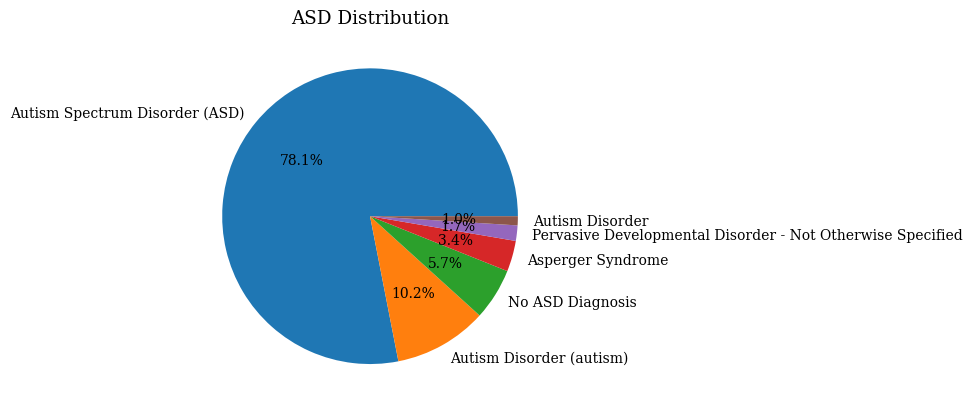

In [30]:
# Count the values in the 'ASD' column
counts = data['diagnosis'].value_counts()
print(counts)
# create a pie chart
plt.pie(counts, labels=data['diagnosis'].unique(), textprops={'fontsize': 10}, autopct='%1.1f%%')

# add a title
plt.title('ASD Distribution')

# show the chart
plt.show()

In [31]:
print(len(data))

3320


We now have 3320 videos

## Removing Lab Members test accounts and Corrupted Video Files

In [32]:
# Removing lab's test accounts
data = data[~data['s3_key_truncated'].str.contains('test|demo|stanfordstudy|aaa333|kaitidunalp|walllab|sdoychev|peter100')]

# Removing videos in '_REVIEWED/Corrupt_Video_Files' directory
data = data[~data['s3_key_truncated'].str.contains('_REVIEWED/Corrupt_Video_Files')]

print(len(data))

3170


## Removing Children who are older than 12 years old

In [34]:
# Removing children over 12 rears old
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(0, inplace=True)
data = data[data['age'] <= 12]
print(len(data))

3125


## Mapping Diagnoses to two categories : ASD (1) and neurotypical (NT) (0)

In [37]:
# Mapping the remaining diagnoses to ASD(1)/NT(0)
map_dict = {
    'Autism Spectrum Disorder (ASD)': 1,
    'Autism Disorder (autism)': 1,
    'Autism Disorder': 1,
    'Asperger Syndrome': 1,
    'Pervasive Developmental Disorder - Not Otherwise Specified': 1,
    'No ASD Diagnosis': 0
}
data['ASD'] = data['diagnosis'].map(map_dict)


1    2904
0     221
Name: ASD, dtype: int64


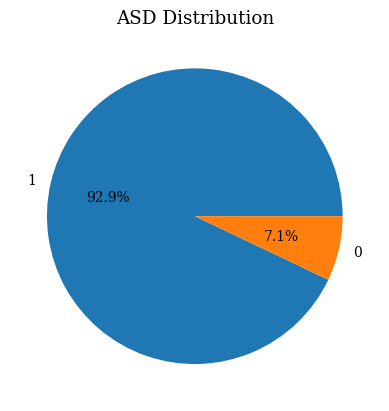

In [38]:
# Count the values in the 'ASD' column
counts = data['ASD'].value_counts()
print(counts)
# create a pie chart
plt.pie(counts, labels=data['ASD'].unique(), textprops={'fontsize': 10}, autopct='%1.1f%%')

# add a title
plt.title('ASD Distribution')

# show the chart
plt.show()

## Creating Child ID and Video Keys

In [39]:
# Creating child id from email and name columns to identify unique children
data['child_id'] = data['email'] + '__' + data['name']

# creating video keys
data['video_key'] = data['s3_key_truncated'] + '.mp4'

In [40]:
# Dropping unnecessary columns
data.drop(['s3_key_truncated', 'diagnosis', 'email', 'name'], axis=1, inplace=True)

# Rearranging columns
data = data[['video_key', 'child_id', 'ASD', 'age', 'gender']].reset_index()
data.drop('index', axis=1, inplace=True)

In [41]:
data.to_csv('../data/dataset_1.csv')
data.head()

,video_key,child_id,ASD,age,gender
0,%2B07758486393/1637011476385/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
1,%2B07758486393/1637011774510/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
2,%2B07758486393/1637011884828/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
3,%2B07766544436/1626976603665/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male
4,%2B07766544436/1626976728265/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male
